<a href="https://colab.research.google.com/github/ralsouza/python_fundamentos/blob/master/src/07_Exploratory_Analysis/01_Exploratory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Analysis
This notebook is about a recent research of software programmers job market. Our objectives is make a initial investigation to find problems in the data, new variable necessities, organization failures and transformation necessities.

Salary survey maked by site [freeCodeCamp.org](https://www.freecodecamp.org) with software programmers in EUA who attented the trainings of CodeCamp.

In [0]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import colorsys
plt.style.use('seaborn-talk')
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load file from Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load dataset
df = pd.read_csv('/content/drive/My Drive/Dados-Pesquisa.csv',sep=',',low_memory=False)
df.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampName,BootcampPostSalary,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventBootcamp,CodeEventCoffee,CodeEventConferences,CodeEventDjangoGirls,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWomenCode,CodeEventWorkshop,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,Gender,HasChildren,HasDebt,HasFinancialDependents,...,PodcastHanselminutes,PodcastJSJabber,PodcastJsAir,PodcastNone,PodcastOther,PodcastProgrammingThrowDown,PodcastRubyRogues,PodcastSEDaily,PodcastShopTalk,PodcastTalkPython,PodcastWebAhead,ResourceBlogs,ResourceBooks,ResourceCodeWars,ResourceCodecademy,ResourceCoursera,ResourceDevTips,ResourceEdX,ResourceEggHead,ResourceFCC,ResourceGoogle,ResourceHackerRank,ResourceKhanAcademy,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceReddit,ResourceSkillCrush,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,SchoolDegree,SchoolMajor,StudentDebtOwe
0,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,United States of America,United States of America,office and administrative support,NaN,Employed for wages,NaN,NaN,0.0,male,0.0,1.0,1.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,20000.0
1,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,United States of America,United States of America,food and beverage,NaN,Employed for wages,NaN,50000.0,NaN,male,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,Front-end happy hour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,"some college credit, no degree",NaN,NaN
2,19.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,United States of America,United States of America,finance,NaN,Employed for wages,NaN,NaN,NaN,male,NaN,0.0,0.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,45.0,United States of America,United States of America,"arts, entertainment, sports, or media",NaN,Employed for wages,NaN,65000.0,NaN,female,NaN,1.0,0.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Cinematography And Film,7000.0
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,United States of America,United States of America,education,NaN,Employed for wages,NaN,45000.0,NaN,female,NaN,1.0,0.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,NaN


In [10]:
# List columns
list(df)

['Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampFullJobAfter',
 'BootcampLoanYesNo',
 'BootcampMonthsAgo',
 'BootcampName',
 'BootcampPostSalary',
 'BootcampRecommend',
 'ChildrenNumber',
 'CityPopulation',
 'CodeEventBootcamp',
 'CodeEventCoffee',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventOther',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWomenCode',
 'CodeEventWorkshop',
 'CommuteTime',
 'CountryCitizen',
 'CountryLive',
 'EmploymentField',
 'EmploymentFieldOther',
 'EmploymentStatus',
 'EmploymentStatusOther',
 'ExpectedEarning',
 'FinanciallySupporting',
 'Gender',
 'HasChildren',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'HoursLearning',
 'ID.x',
 'ID.y',
 'Income',
 'IsEthnicMinorit

In [13]:
df.describe()

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampPostSalary,BootcampRecommend,ChildrenNumber,CodeEventBootcamp,CodeEventCoffee,CodeEventConferences,CodeEventDjangoGirls,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWomenCode,CodeEventWorkshop,CommuteTime,ExpectedEarning,FinanciallySupporting,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,Income,IsEthnicMinority,IsReceiveDiabilitiesBenefits,IsSoftwareDev,...,PodcastCodeNewbie,PodcastCodingBlocks,PodcastDeveloperTea,PodcastDotNetRocks,PodcastHanselminutes,PodcastJSJabber,PodcastJsAir,PodcastNone,PodcastProgrammingThrowDown,PodcastRubyRogues,PodcastSEDaily,PodcastShopTalk,PodcastTalkPython,PodcastWebAhead,ResourceBlogs,ResourceBooks,ResourceCodeWars,ResourceCodecademy,ResourceCoursera,ResourceDevTips,ResourceEdX,ResourceEggHead,ResourceFCC,ResourceGoogle,ResourceHackerRank,ResourceKhanAcademy,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourcePluralSight,ResourceReddit,ResourceSkillCrush,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,StudentDebtOwe
count,13613.000000,15380.000000,933.000000,635.000000,934.000000,631.000000,330.000000,937.000000,2554.000000,42.0,2077.0,2898.0,18.0,22.0,558.0,2422.0,313.0,480.0,8900.0,255.0,14.0,743.0,711.0,23.0,8339.000000,6077.000000,3996.000000,4012.000000,13610.000000,13640.000000,13625.000000,6371.000000,13550.000000,6371.000000,1.501000e+03,14942.000000,7329.000000,13645.000000,13530.000000,15537.000000,...,1878.0,16.0,80.0,18.0,19.0,1356.0,29.0,11040.0,34.0,79.0,775.0,83.0,41.0,15.0,30.0,144.0,1563.0,9586.0,4844.0,968.0,3472.0,29.0,10937.0,55.0,30.0,3746.0,150.0,26.0,1687.0,3565.0,29.0,36.0,30.0,191.0,422.0,3306.0,4130.0,121.0,121.0,3514.000000
mean,29.175421,0.061964,0.689175,0.584252,0.332976,9.055468,63740.506061,0.785486,1.896241,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,55.304473,53717.586967,0.196697,0.642822,0.470683,0.295528,0.879339,0.280176,0.076236,0.589546,1.897040e+05,15.323317,44930.010506,0.238402,0.022912,0.276952,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,34556.143711
std,9.017716,0.241097,0.463080,0.493239,0.471531,12.968035,26347.200265,0.410704,1.115975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.442833,30078.511957,0.397551,0.479228,0.499158,0.456296,0.325744,0.449120,0.265385,0.491955,4.547212e+05,14.274867,35582.783216,0.426122,0.149629,0.447507,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54423.139781
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6000.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,6000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,6000.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000
25%,23.000000,0.000000,0.000000,0.000000,0.000000,3.000000,50000.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,15.000000,35000.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,7.200000e+04,5.000000,20000.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10000.000000
50%,27.000000,0.000000,1.000000,1.000000,0.000000,6.000000,60000.000000,1.

# Age Distribuition
Most professionals who work as software programmers are between 20 and 30 years old, being 25 years old more often.

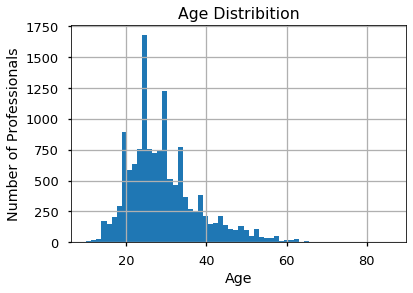

In [15]:
df.Age.hist(bins=60)
plt.xlabel('Age')
plt.ylabel('Number of Professionals')
plt.title('Age Distribition')
plt.show()

# Gender Distribuition
Most of the respondents are male, more or less 75%.

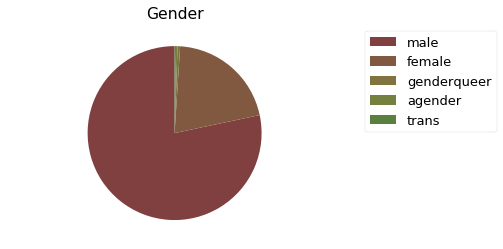

In [9]:
# Define labels
labels = df.Gender.value_counts().index
num = len(df.EmploymentField.value_counts().index)

# Color list
listHSV = [(x*1.0/num,0.5,0.5) for x in range(num)]
listRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listHSV))

# Pie chart
slices, text = plt.pie(df.Gender.value_counts(), colors=listRGB,startangle=90)
plt.axes().set_aspect('equal','datalim')
plt.legend(slices,labels,bbox_to_anchor=(1.05,1))
plt.title('Gender')
plt.show()

# Professional Interests
The professionals' main interest is Web Development (Full-Stack: Front-End and Back-End), followed by Data Science.

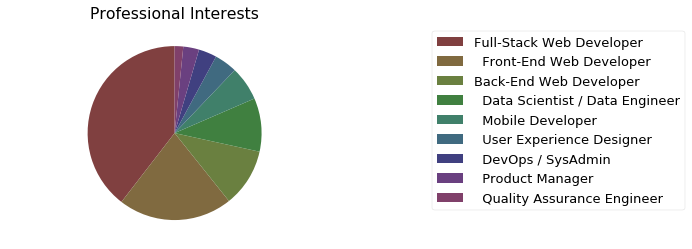

In [11]:
# Define labels
labels = df.JobRoleInterest.value_counts().index
num = len(df.JobRoleInterest.value_counts().index)
colors = ['OliveDrab','Orange','OrangeRed','DarkCyan','Salmon','Sienna','Maroon','LightSlateGrey','DimGray']

# Color list
listHSV = [(x*1.0/num,0.5,0.5) for x in range(num)]
listRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listHSV))

# Pie chart
slices, text = plt.pie(df.JobRoleInterest.value_counts(), colors=listRGB,startangle=90)
plt.axes().set_aspect('equal','datalim')
plt.legend(slices,labels,bbox_to_anchor=(1.25,1))
plt.title('Professional Interests')
plt.show()

# Employability Distribuition
Most programmers work on software development and IT area, but other areas such as financial and health are also significants.

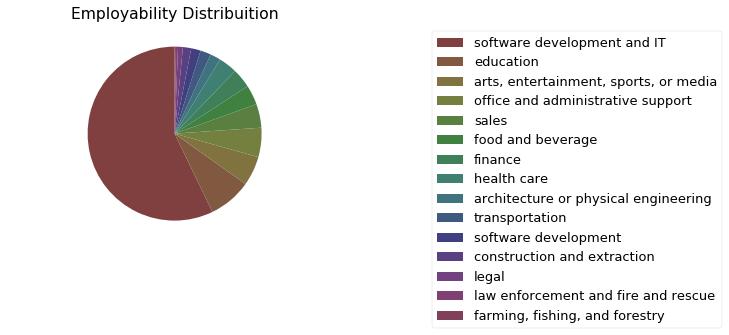

In [12]:
# Define labels
labels = df.EmploymentField.value_counts().index
num = len(df.EmploymentField.value_counts().index)

# Color list
listHSV = [(x*1.0/num,0.5,0.5) for x in range(num)]
listRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listHSV))

# Pie chart
slices, text = plt.pie(df.EmploymentField.value_counts(), colors=listRGB,startangle=90)
plt.axes().set_aspect('equal','datalim')
plt.legend(slices,labels,bbox_to_anchor=(1.25,1))
plt.title('Employability Distribuition')
plt.show()

# Work Preferences by Age
As age increases, the interest in freelance jobs increase too, being the preferred model of professionals over 60 years old. Younger professionais prefer to work in Startups or in their own bussiness. Professionais between 20 and 50 year old prefer to work in medium-size companies.

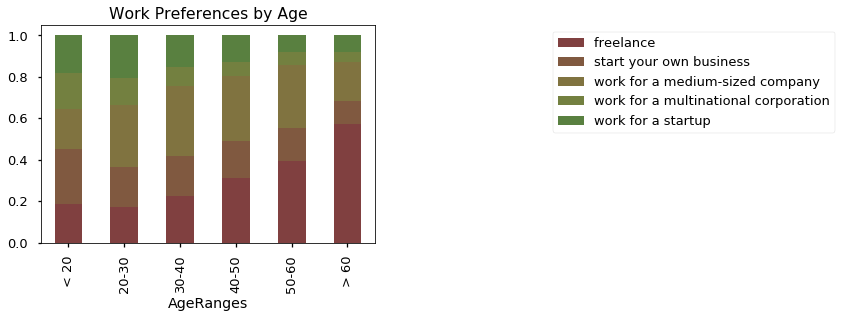

In [16]:
# Groupping data
df_age_ranges = df.copy()
bins = [0,20,30,40,50,60,100]

# Create range of ages
df_age_ranges['AgeRanges'] = pd.cut(df_age_ranges['Age'],
                                    bins,
                                    labels=['< 20','20-30','30-40','40-50','50-60','> 60'])

df2 = pd.crosstab(df_age_ranges.AgeRanges,
                  df_age_ranges.JobPref).apply(lambda r: r/r.sum(),axis=1)

# Define labels
labels = df.EmploymentField.value_counts().index
num = len(df.EmploymentField.value_counts().index)

# Color list
listHSV = [(x*1.0/num,0.5,0.5) for x in range(num)]
listRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listHSV))

# Full Stacked bar chart
ax1 = df2.plot(kind='bar',stacked=True,color=listRGB,title='Work Preferences by Age')
lines,labels = ax1.get_legend_handles_labels()
ax1.legend(lines,labels,bbox_to_anchor=(1.51,1))
plt.show()